In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
from utils.discrete import *
import ot

/tmp/ipykernel_1277130/170683086.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_1277130/170683086.py:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


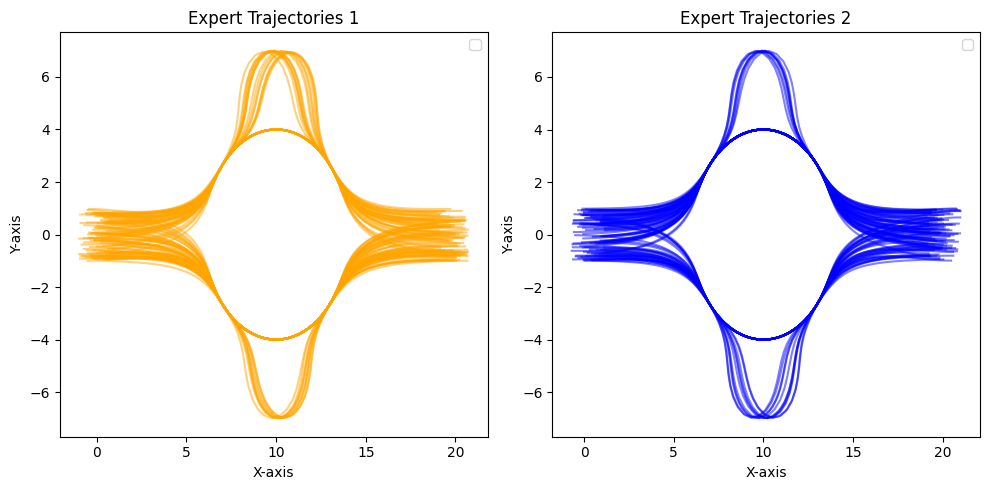

In [5]:
# Loading training trajectories
all_points1 = []    # want modes 1, 2, 4, 6
all_points2 = []    # want modes 1, 2, 3, 5
with open('data/trajs_noise1.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        x1, y1 = float(row[4]), float(row[5])
        x2, y2 = float(row[7]), float(row[8])
        all_points1.append([x1, y1])
        all_points2.append([x2, y2])

num_trajectories = 1000
points_per_trajectory = 100

expert_data1 = [
    all_points1[i * points_per_trajectory:(i + 1) * points_per_trajectory]
    for i in range(num_trajectories)
]
first_trajectory1 = expert_data1[0]
x1 = [point[0] for point in first_trajectory1]
y1 = [point[1] for point in first_trajectory1]

expert_data2 = [
    all_points2[i * points_per_trajectory:(i + 1) * points_per_trajectory]
    for i in range(num_trajectories)
]
first_trajectory2 = expert_data2[0]
x2 = [point[0] for point in first_trajectory2]
y2 = [point[1] for point in first_trajectory2]

expert_data1 = np.array(expert_data1)
expert_data2 = np.array(expert_data2)

n_traj = 100

# ranodmly select 10 trajectories from the expert data
indices = np.random.choice(num_trajectories, size=n_traj, replace=False)
expert_data1 = expert_data1[indices]
expert_data2 = expert_data2[indices]

# Plotting the trajectories
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Expert Trajectories 1")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
for trajectory in expert_data1:
    plt.plot([point[0] for point in trajectory], [point[1] for point in trajectory], alpha=0.5, color='orange')
# plt.scatter(x1, y1, color='red', label='First Trajectory')
plt.legend()
plt.subplot(1, 2, 2)
plt.title("Expert Trajectories 2")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
for trajectory in expert_data2:
    plt.plot([point[0] for point in trajectory], [point[1] for point in trajectory], alpha=0.5, color='blue')
# plt.scatter(x2, y2, color='red', label='First Trajectory')
plt.legend()   
plt.tight_layout()

In [15]:
# load the diffusion data and mlp data

load_path_ours = "sampled_trajs/mpc_P25E1_nolf_revisedsampling"
load_path_vanilla = "sampled_trajs/mpc_P25E1_vanillaCTDE"

ours1 = []
vanilla1 = []
ours2 = []
vanilla2 = []

for i in range(n_traj):
    ours1.append(np.load(load_path_ours + "/" + f"mpc_traj1_{i}.npy"))
    ours2.append(np.load(load_path_ours + "/" + f"mpc_traj2_{i}.npy"))
    vanilla1.append(np.load(load_path_vanilla + "/" + f"mpc_traj1_{i}.npy"))
    vanilla2.append(np.load(load_path_vanilla + "/" + f"mpc_traj2_{i}.npy"))

ours1 = np.array(ours1)
ours2 = np.array(ours2)
vanilla1 = np.array(vanilla1)
vanilla2 = np.array(vanilla2)

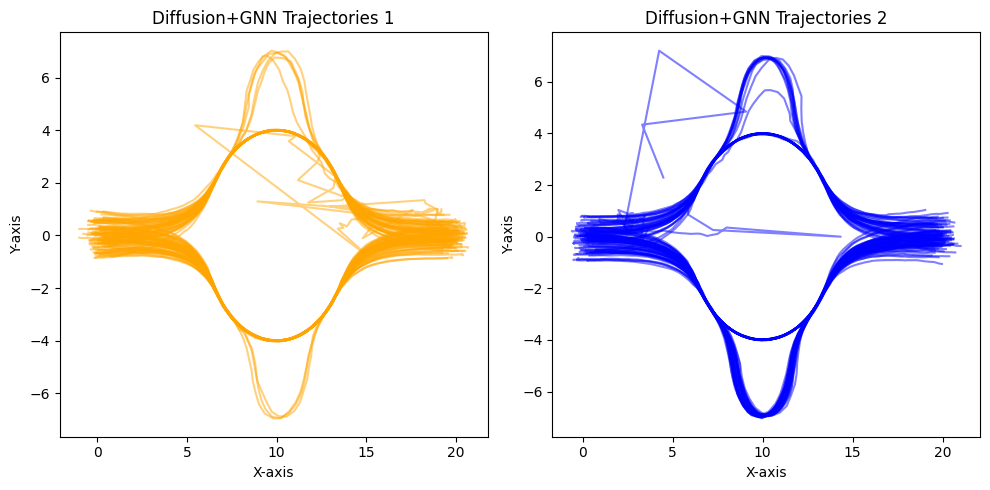

In [16]:
# Plotting diffision+gnn trajectories

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Diffusion+GNN Trajectories 1")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# for trajectory in mlp_gnn_data1:
#     plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
for trajectory in ours1:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
# plt.scatter(x1, y1, color='red', label='First Trajectory')

plt.subplot(1, 2, 2)
plt.title("Diffusion+GNN Trajectories 2")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# for trajectory in mlp_gnn_data2:
#     plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
for trajectory in ours2:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='blue')
# plt.scatter(x2, y2, color='red', label='First Trajectory')

plt.tight_layout()

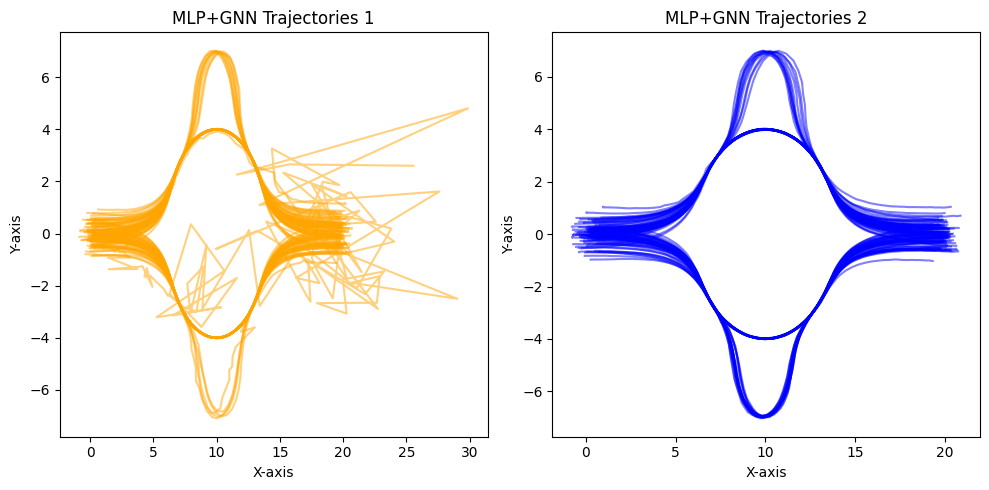

In [17]:
# Plotting mlp+gnn trajectories

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

plt.subplot(1, 2, 1)
plt.title("MLP+GNN Trajectories 1")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

for trajectory in vanilla1:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')

plt.subplot(1, 2, 2)
plt.title("MLP+GNN Trajectories 2")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
for trajectory in vanilla2:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='blue')


plt.tight_layout()

In [18]:
# compute frechet distance between the trajectories from expert and diffusion_gnn
fast_frechet = FastDiscreteFrechetMatrix(euclidean)

D_ours1 = np.zeros((n_traj,n_traj))
D_ours2 = np.zeros((n_traj,n_traj))

D_vanilla1 = np.zeros((n_traj,n_traj))
D_vanilla2 = np.zeros((n_traj,n_traj))

for i in range(n_traj):
    for j in range(n_traj):
        D_ours1[i,j] = fast_frechet.distance(expert_data1[i], ours1[j])
        D_ours2[i,j] = fast_frechet.distance(expert_data2[i], ours2[j])
        D_vanilla1[i,j] = fast_frechet.distance(expert_data1[i], vanilla1[j])
        D_vanilla2[i,j] = fast_frechet.distance(expert_data2[i], vanilla2[j])

w1 = np.ones(n_traj) / n_traj
w2 = np.ones(n_traj) / n_traj

# compute the optimal transport distance between the trajectories from expert and ours
ot_dist1 = ot.emd2(w1, w2, D_ours1)
ot_dist2 = ot.emd2(w1, w2, D_ours2)
print("Optimal Transport distance between expert and ours trajectories Agent-1: ", ot_dist1)
print("Optimal Transport distance between expert and ours trajectories Agent-2: ", ot_dist2)

# compute the optimal transport distance between the trajectories from expert and vanilla
ot_dist1 = ot.emd2(w1, w2, D_vanilla1)
ot_dist2 = ot.emd2(w1, w2, D_vanilla2)
print("Optimal Transport distance between expert and vanilla trajectories Agent-1: ", ot_dist1)
print("Optimal Transport distance between expert and vanilla trajectories Agent-2: ", ot_dist2)

Optimal Transport distance between expert and ours trajectories Agent-1:  1.0953246104835785
Optimal Transport distance between expert and ours trajectories Agent-2:  2.5727280205906906
Optimal Transport distance between expert and vanilla trajectories Agent-1:  1.5621407716821925
Optimal Transport distance between expert and vanilla trajectories Agent-2:  1.4129006866411997
